In [3]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio

##to plot and check

<xarray.DataArray 'PCT_CROP' ()>
array(258.17199525)


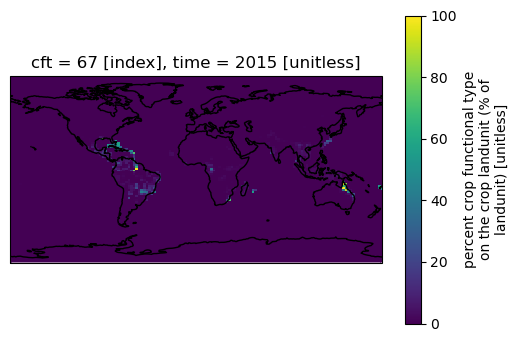

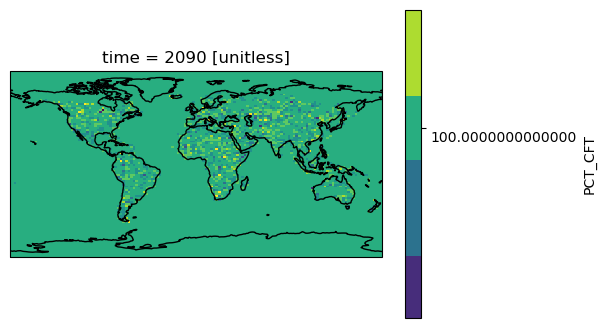

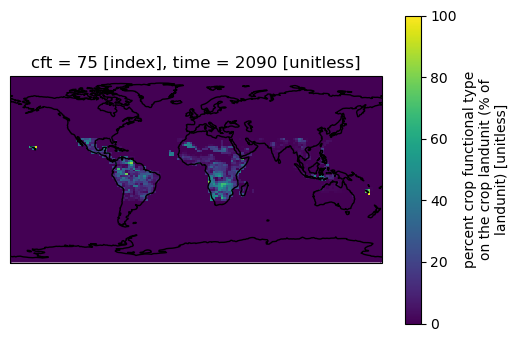

In [2]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
var = ['PCT_NAT_PFT','PCT_CFT', 'PCT_CROP']
var_area = (np.multiply((dset1[var]/100), dset1['AREA'])) # converting variables in percentage to area 

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_NAT_PFT'].sel(time=2090).sum('natpft').plot()
plt.title('sum of NAT_PFTs-2090')
plt.close()
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_NAT_PFT'].sel(time=2015).sum('natpft').plot()
plt.title('sum of NAT_PFTs-2015')
plt.close()
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CROP'].sel(time=2015).plot()
plt.title('PCT_CROP-2015')
axs.coastlines(linewidth=1)
plt.close()

#plt.close()

#diff = (dset1['PCT_CROP'].sel(time=2090))-(dset1['PCT_CROP'].sel(time=2015)) 
#diff = (dset1['PCT_NAT_PFT'].sum('natpft').sel(time=2090))-(dset1['PCT_NAT_PFT'].sum('natpft').sel(time=2015)) 
#diff = (var_area['PCT_CFT'].sum('cft').sel(time=2090))-(var_area['PCT_CFT'].sum('cft').sel(time=2015)) 
diff_CFT = (dset1['PCT_NAT_PFT'].sel(time=2090))-(dset1['PCT_NAT_PFT'].sel(time=2015))
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(diff_CFT.sum('natpft')).plot()
plt.title('Diff (2090-2015) in sum of PCT_NAT_PFT')
axs.coastlines(linewidth=1)
plt.close()
diff_CFT = (dset1['PCT_CROP'].sel(time=2090))-(dset1['PCT_CROP'].sel(time=2015))
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(diff_CFT).plot()
plt.title('Diff (2090-2015) in sum of PCT_CROP')
axs.coastlines(linewidth=1)
plt.close()
((dset1['PCT_CROP'].sel(time=2099))-dset1['PCT_CROP'].sel(time=2015)).sum()

CropArea_diff=(dset1['AREA']*dset1['LANDFRAC_PFT']*((dset1['PCT_CROP']/100).sel(time=2016)))-(dset1['AREA']*dset1['LANDFRAC_PFT']*((dset1['PCT_CROP']/100).sel(time=2015)))

diff = (dset1['PCT_CROP'].sel(time=2016))-(dset1['PCT_CROP'].sel(time=2015))          
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
diff.plot()
axs.coastlines(linewidth=1)
plt.title('Crop area increase 2016 compared to 2015')
plt.close()
# diff plotted in terms of area
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(CropArea_diff).plot()
plt.title('Croparea increase 2016 wrt 2015 (km2')
axs.coastlines(linewidth=1)
plt.close()

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT'][dict(cft=52)].sel(time=2015).plot()
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT'][dict(cft=52)].sel(time=2090).plot()
axs.coastlines(linewidth=1)
print(diff.sum())
plt.close()
#print()
Area_all_crop=dset1['AREA']*dset1['LANDFRAC_PFT']*(dset1['PCT_CROP']/100).sel(time=2016)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
Area_all_crop.plot()
axs.coastlines(linewidth=1)
plt.close()

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT'].sel(time=2090).sum('cft').plot()
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT'].sel(time=2090).isel(cft=60).plot()
axs.coastlines(linewidth=1)

##convert PCT_CROP and PCT_CFT to area and do the calculations

<xarray.DataArray 'PCT_CFT_area' ()>
array(40130.0144179)
Coordinates:
    cft      int32 60
    time     int32 2090
<xarray.DataArray 'PCT_CFT_area' ()>
array(5053265.02480437)
Coordinates:
    cft      int32 67


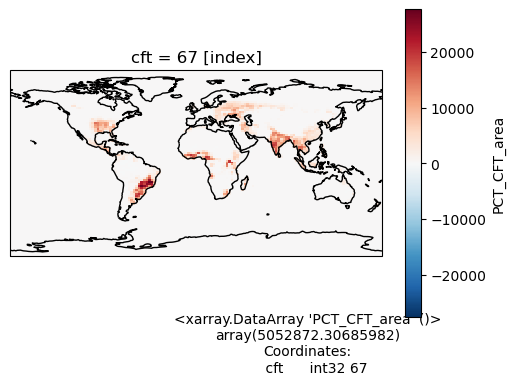

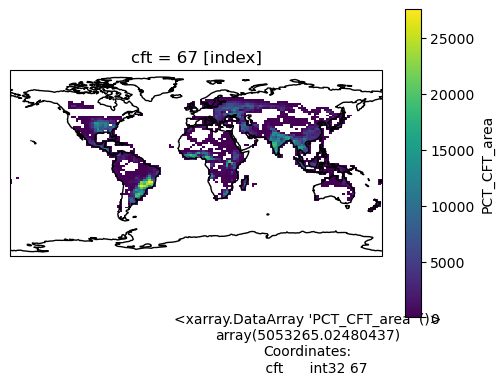

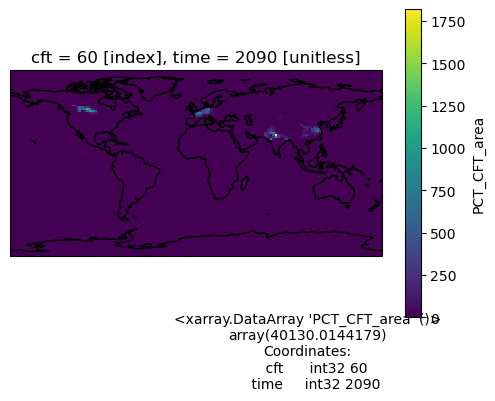

In [50]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
dset1['PCT_CROP_area']=(dset1['PCT_CROP']/100)*dset1['AREA']*dset1['LANDFRAC_PFT']
dset1['PCT_CFT_area'] =(dset1['PCT_CFT']/100)*dset1['AREA']*dset1['LANDFRAC_PFT']*(dset1['PCT_CROP']/100)

TotCropArea_diff_2090= (dset1['PCT_CROP_area'].sel(time=2090)) - (dset1['PCT_CROP_area'].sel(time=2015))
TotCFTArea_diff_2090 = (dset1['PCT_CFT_area'].sel(time=2090).sum('cft')) - (dset1['PCT_CFT_area'].sel(time=2015).sum('cft')) 

# Total area without sugarcane in 2090 and 2015
dset1_without_sugarcane_2090 = (dset1['PCT_CFT_area'].sum('cft').sel(time=2090))- ((dset1['PCT_CFT_area'].isel(cft=52).sel(time=2090)))
dset1_without_sugarcane_2015 = (dset1['PCT_CFT_area'].sum('cft').sel(time=2015))- ((dset1['PCT_CFT_area'].isel(cft=52).sel(time=2015)))
#Difference in sugarcane area
TotCFTArea_diff_2090_wo_sugarcane = ((dset1['PCT_CFT_area'][dict(cft=52)].sel(time=2090))-(dset1['PCT_CFT_area'][dict(cft=52)].sel(time=2015)))       # diff in sugarcane area

# += TotCFTArea_diff_2090
#dset1['PCT_CFT_area'].sel(time=2090)[:].sum()
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
TotCFTArea_diff_2090_wo_sugarcane.plot()
plt.text(0.8, -0.3, TotCFTArea_diff_2090_wo_sugarcane.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

mask = TotCFTArea_diff_2090_wo_sugarcane > 0
masked_data = TotCFTArea_diff_2090_wo_sugarcane.where(mask) 
dset1['PCT_CFT_area'].sel(time=2090)[:].sum()
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
masked_data.plot()
plt.text(0.8, -0.3, masked_data.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)
#+= TotCFTArea_diff_2090
print(dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].sum())
print(masked_data.sum())

##Now, increase the corn area by adding the increase in area to it

<xarray.DataArray 'PCT_CFT_area' ()>
array(5075931.93196875)
Coordinates:
    time     int32 2090


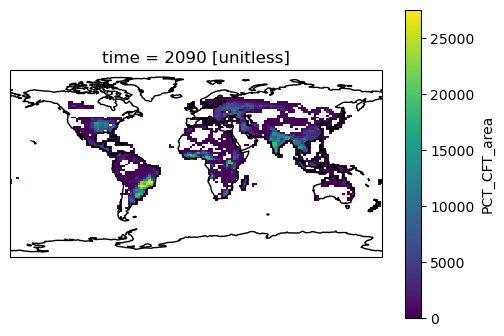

In [51]:
#dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)] += TotCFTArea_diff_2090

#print(masked_data.sum())
#print(dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].shape)
#print(TotCFTArea_diff_2090.shape)
a=dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)]+masked_data
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
a.plot()
axs.coastlines(linewidth=1)

print(a.sum())

##plot before and after

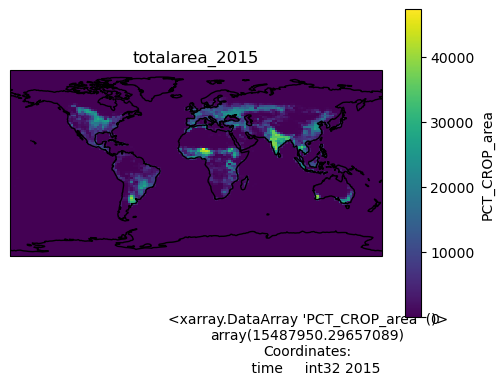

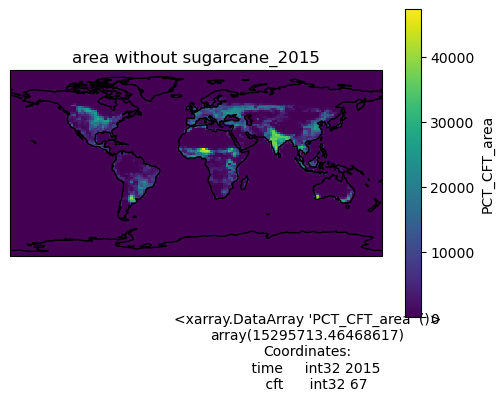

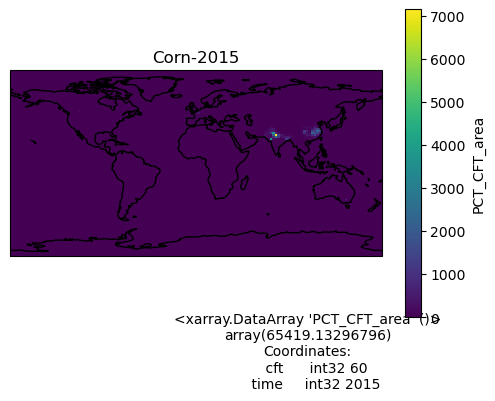

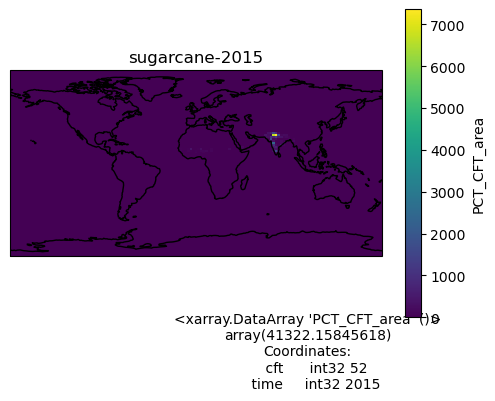

In [12]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CROP_area'].sel(time=2090).plot()
axs.coastlines(linewidth=1)
plt.text(0.8, -0.3, dset1['PCT_CROP_area'].sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('totalarea_2090')

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1_without_sugarcane_2090.plot()
plt.title('area without sugarcane_2090')
plt.text(0.8, -0.3, dset1_without_sugarcane_2090.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].plot()
axs.coastlines(linewidth=1)
plt.title('Corn-2090')

plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)].plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('sugarcane-2090')
axs.coastlines(linewidth=1)

In [39]:
# Copy the values of PCT_CFT_area at time 2015 to that in 2090
#dset1_without_sugarcane_2090 = dset1_without_sugarcane_2015
#dset1['PCT_CROP_area'].sel(time=2090)[:] = dset1['PCT_CROP_area'].sel(time=2015).values  # keep PCT_CROP areas in 2090 as of 2015
#dset1['PCT_CFT_area'].sel(time=2090)[:] = dset1['PCT_CFT_area'].sel(time=2015).values    # keep all cft areas in 2090 as of 2015
dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)][:] =dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)].values  # then copy back sugarcane area of 2090 to 2090

dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)]=a


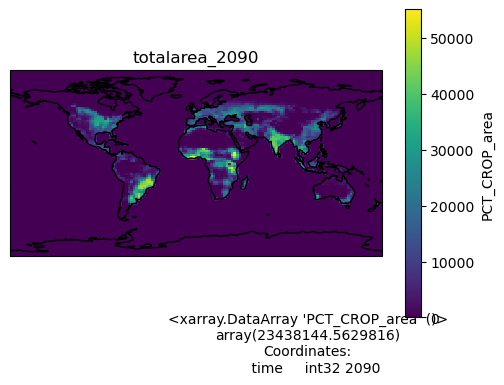

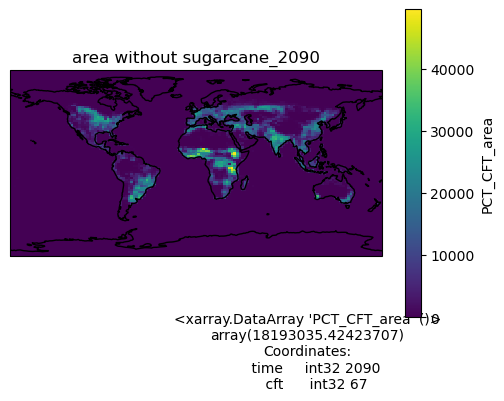

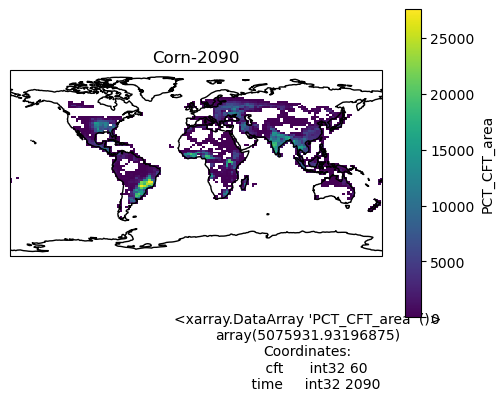

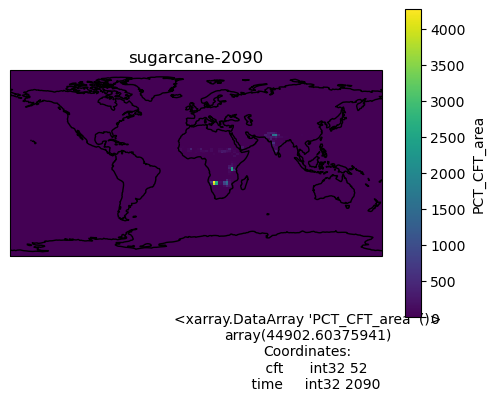

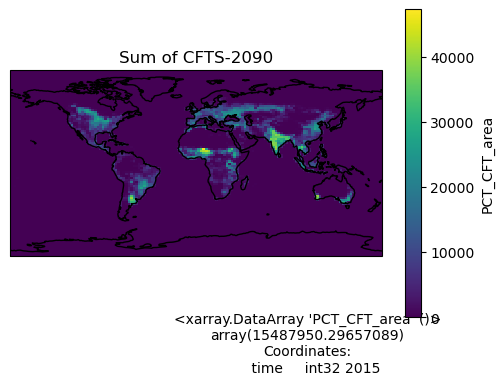

In [40]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CROP_area'].sel(time=2090).plot()
axs.coastlines(linewidth=1)
plt.text(0.8, -0.3, dset1['PCT_CROP_area'].sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('totalarea_2090')

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1_without_sugarcane_2090.plot()
plt.title('area without sugarcane_2090')
plt.text(0.8, -0.3, dset1_without_sugarcane_2090.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].plot()
axs.coastlines(linewidth=1)
plt.title('Corn-2090')

plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)].plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('sugarcane-2090')
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].sel(time=2015).sum('cft').plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].sel(time=2015).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('Sum of CFTS-2090')
axs.coastlines(linewidth=1)

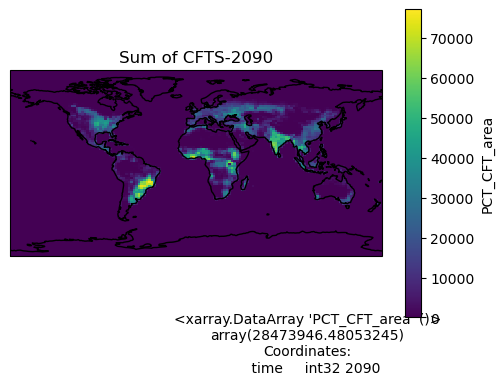

In [41]:

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].sel(time=2090).sum('cft').plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('Sum of CFTS-2090')
axs.coastlines(linewidth=1)



/cluster/projects/nn9576k/conda_envs/jupyter/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


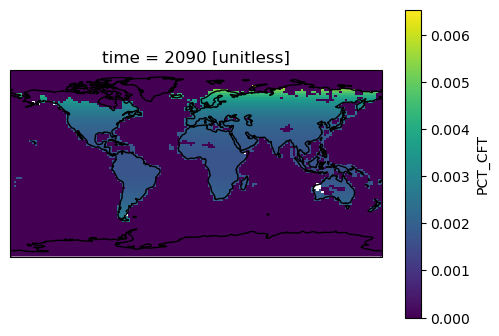

In [85]:
dset1['PCT_CROP_area']=(dset1['PCT_CROP']/100)*dset1['AREA']*dset1['LANDFRAC_PFT']

dset1['PCT_CFT'] = (dset1['PCT_CFT_area'] / (dset1['AREA'] * dset1['PCT_CROP_area'])) * 100

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT'].sel(time=2090).sum('cft').plot()
axs.coastlines(linewidth=1)


## Use PCT_CFT as it is and do the calculations

In [140]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)

TotCFTArea_diff_2090 = (dset1['PCT_CFT'].sel(time=2090).sum('cft')) - (dset1['PCT_CFT'].sel(time=2015).sum('cft')) 
mask = TotCFTArea_diff_2090 > 0
masked_data = TotCFTArea_diff_2090.where(mask)          # consider only the values above zero
#dset1['temp_var'] = xr.where((TotCropArea_diff_2090 > 0) & (TotCFTArea_diff_2090 > 0), dset1['temp_var'], 0)

#dset1['PCT_CFT'].sel(time=2090)[:] = dset1['PCT_CFT'].sel(time=2015).values
print(dset1['PCT_CFT'].sel(time=2090).isel(cft=60).sum())
#dset1['PCT_CFT'].loc[dict(cft=60, time=2090)] += masked_data
dset1['PCT_CFT'] = dset1['PCT_CFT'].where(~mask, masked_data)
print(dset1['PCT_CFT'].sel(time=2090).isel(cft=60).sum())

#dset1['PCT_CFT'].to_netcdf('/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c1905_2090modified.nc', encoding={'PCT_CFT': {'dtype': 'float64'}})
masked_data


<xarray.DataArray 'PCT_CFT' ()>
array(15992.55632002)
Coordinates:
    cft      int32 75
    time     int32 2090
<xarray.DataArray 'PCT_CFT' ()>
array(11510.60341577)
Coordinates:
    cft      int32 75
    time     int32 2090


<xarray.DataArray 'PCT_CFT' (Latitude: 96, Longitude: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5

In [139]:

mask = TotCFTArea_diff_2090 > 0
masked_data = TotCFTArea_diff_2090.where(mask)
dset1['PCT_CFT'].loc[dict(cft=60, time=2090)]

<xarray.DataArray 'PCT_CFT' (Latitude: 96, Longitude: 144)>
[13824 values with dtype=float64]
Coordinates:
    cft        int32 60
    time       int32 2090
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:  percent crop functional type on the crop landunit (% of landu...
    units:      unitless

<xarray.DataArray 'PCT_CFT' ()>
array(15992.55632002)
Coordinates:
    cft      int32 75
    time     int32 2090
<xarray.DataArray 'PCT_CFT' ()>
array(1382097.82785321)
Coordinates:
    time     int32 2090


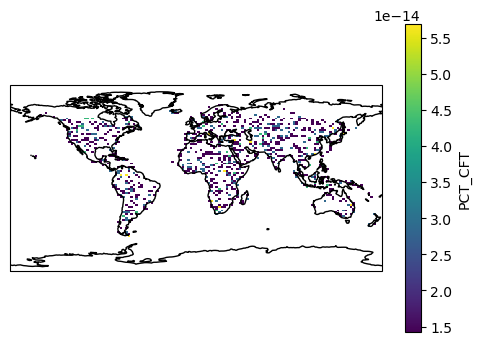

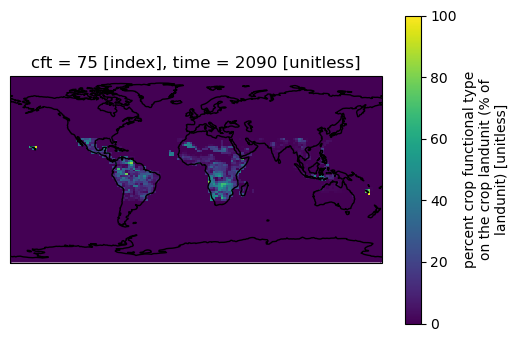

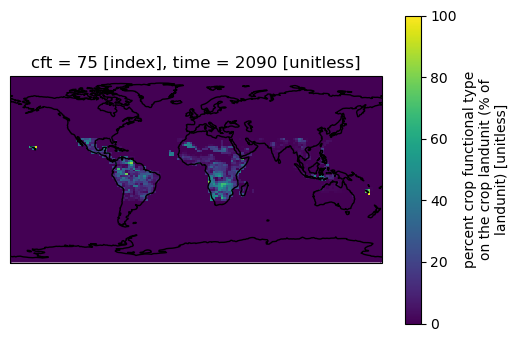

In [128]:
#Area_all_crop=dset1['AREA']*dset1['LANDFRAC_PFT']*(dset1['PCT_CROP']/100).sel(time=2016)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
masked_data.plot()
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT'].sel(time=2090).isel(cft=60).plot()
axs.coastlines(linewidth=1)
dset1['PCT_CFT'].loc[dict(cft=60, time=2090)] += masked_data
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT'].sel(time=2090).isel(cft=60).plot()
axs.coastlines(linewidth=1)
print(dset1['PCT_CFT'].sel(time=2090).isel(cft=60).sum())

print(dset1['PCT_CFT'].sel(time=2090).sum())


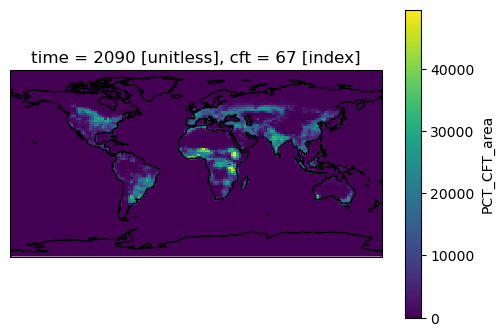

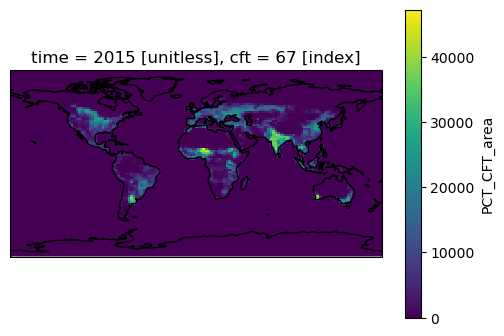

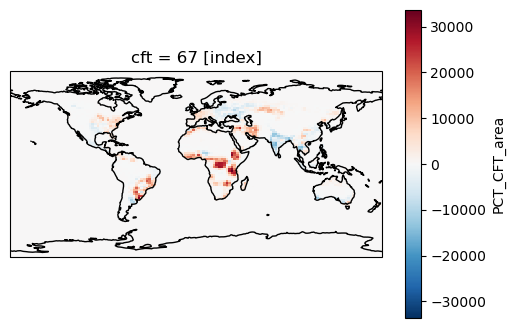

In [38]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1_without_sugarcane_2090.plot()
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1_without_sugarcane_2015.plot()
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset1_without_sugarcane_2090-dset1_without_sugarcane_2015).plot()
axs.coastlines(linewidth=1)
CROParea_wo_cane= (dset1_without_sugarcane_2090-dset1_without_sugarcane_2015)

#Modify the landuse timeseries- keep the crop area for food in 2015 for the rest of the series, preserve sugarcane areas as it is, the croparea diff is given to a biocrop

In [33]:
#dset1['PCT_CROP'].loc[dict(time=2090)]=dset1['PCT_CROP'].sel(time=2015)

#dset1['temp_var'] = TotCropArea_diff_2090
#dset1['temp_var'] = xr.where((TotCropArea_diff_2090 > 0) & (TotCFTArea_diff_2090 > 0), dset1['temp_var'], 0)

CROParea_wo_cane= CROParea_wo_cane+dset1['PCT_CFT_area'][dict(cft=60)].sel(time=2090)   # adding the additional area to corn
#dset1['temp_var'] =
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['temp_var'].plot()
axs.coastlines(linewidth=1)
plt.close()


<xarray.DataArray 'temp_var' ()>
array(8078386.08704623)

In [43]:

CROParea_wo_cane=(dset1['PCT_CFT_area'][dict(cft=60)].sel(time=2090)-dset1['PCT_CFT_area'][dict(cft=60)].sel(time=2015))
print(CROParea_wo_cane.sum())
sum_above_zero = 0
for row in CROParea_wo_cane:
    for value in row:
        if value > 0:
            sum_above_zero += value
print(sum_above_zero)



<xarray.DataArray 'PCT_CFT_area' ()>
array(310055.19547722)
Coordinates:
    cft      int32 75
<xarray.DataArray 'PCT_CFT_area' ()>
array(441238.19852692)
Coordinates:
    cft        int32 75
    Latitude   float64 -29.37
    Longitude  float64 15.0


<xarray.DataArray 'PCT_CROP' ()>
array(0.)

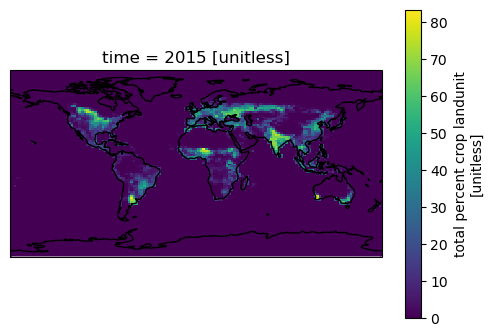

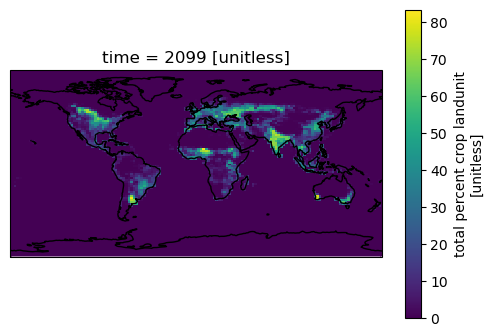

In [3]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
ref_data = dset1['PCT_CFT'].sel(time=2015)

for year in range(2016, 2100):
    Cropinc= (dset1['PCT_CROP'].sel(time=year))-(dset1['PCT_CROP'].sel(time=2015)) 
    dset1['PCT_CROP'].loc[dict(time=year)]=dset1['PCT_CROP'].sel(time=2015)

dset1['PCT_CROP'].loc[dict(time=2100)] =dset1['PCT_CROP'].sel(time=2015)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CROP'].sel(time=2015).plot()
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CROP'].sel(time=2099).plot()
axs.coastlines(linewidth=1)
(dset1['PCT_CROP'].sel(time=2100)-dset1['PCT_CROP'].sel(time=2015)).sum()

<xarray.DataArray 'PCT_CROP' ()>
array(0.)


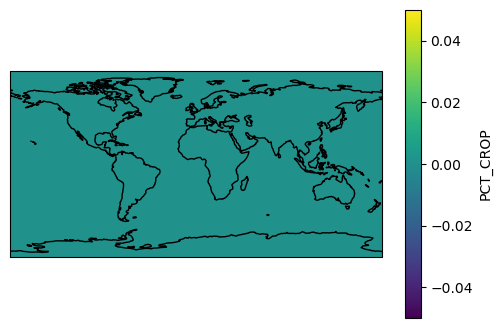

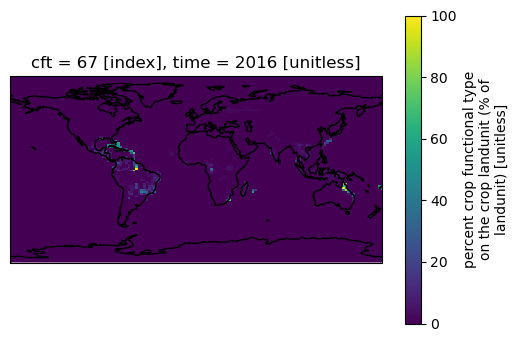

In [5]:


dset1['PCT_CROP'].sel(time=2090).sum()
dset1['PCT_CROP'].sel(time=2015).sum()
sum_var_above_zero = np.sum(diff.where(diff < 0))
#sum_var_above_zero
dset1.sel(time=2015)['PCT_CROP']+dset1.sel(time=2015)['PCT_NAT_PFT']
dset1['PCT_CFT'].sel(time=2090).sum('cft')
a=dset1['PCT_CFT'].sum('cft').sel(time=2090)
b=dset1['PCT_CFT'].sum('cft').sel(time=2015)
(a-b).sum()

<xarray.DataArray 'PCT_CFT' ()>
array(-1.15107923e-12)

Plots from Surface data

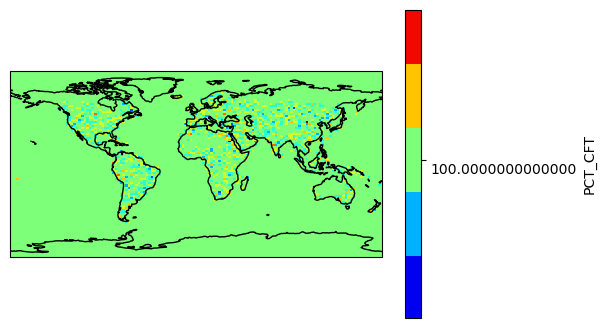

In [48]:
file2 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304.nc'     #SSP534
dset2 = xr.open_dataset(file2, decode_times=False)
dset2 = dset2.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset2=dset2.assign_coords(Latitude=dset2['LATIXY'][:,0].values)
dset2=dset2.assign_coords(Longitude=dset2['LONGXY'][0,:].values)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset2.LANDFRAC_PFT.plot()
axs.coastlines(linewidth=1)
plt.close()
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset2['PCT_CFT'].isel(cft=56)).plot()
axs.coastlines(linewidth=1)
plt.close()
#dset2['PCT_CFT'][dict(cft=56)] =  xr.where(diff > 0, diff,  dset2['PCT_CFT'][dict(cft=56)])
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset2['PCT_CFT'].sum('cft').plot(cmap='jet') 
axs.coastlines(linewidth=1)
#plt.close()


#crop_area_surf=dset2['PCT_CROP']* dset2['AREA']
#natveg_area_surf=dset2['PCT_NATVEG']*dset2['AREA']

#dset2['PCT_CFT'][dict(cft=56)] = dset2['PCT_CFT'].isel(cft=52)
#dset2['PCT_CFT'][dict(cft=52)] = 0
#dset2.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c232604.nc', encoding={'PCT_CFT': {'dtype': 'float64'}})



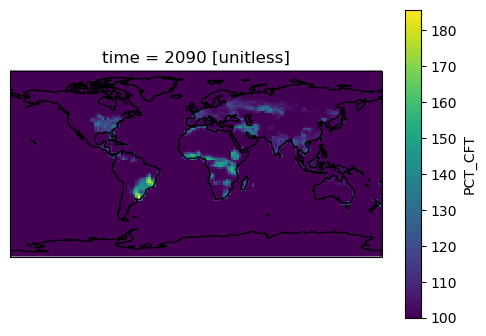

In [14]:
file2 = '/cluster/projects/nn9576k/anusha/DATA/landuse.tseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr2090_c25042023_allvar.nc'
dset2 = xr.open_dataset(file2, decode_times=False)
dset2 = xr.open_dataset(file2, decode_times=False)
dset2 = dset2.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset2=dset2.assign_coords(Latitude=dset2['LATIXY'][:,0].values)
dset2=dset2.assign_coords(Longitude=dset2['LONGXY'][0,:].values)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset2['PCT_CFT'].sum('cft').plot() 
axs.coastlines(linewidth=1)

In [3]:
file1  = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'           # file modifies with biocrops
dset1 = xr.open_dataset(file1, decode_times=False)
surfdat_2000= '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304.nc'
dset_surf2000 = xr.open_dataset(surfdat_2000, decode_times=False)
#diff = (dset1['PCT_CROP'].sel(time=2090))-(dset1['PCT_CROP'].sel(time=2015)) 
dset_surf2000['PCT_CFT'][dict(cft=56)]=  xr.where(diff > 0, diff,  dset_surf2000['PCT_CFT'][dict(cft=56)])





#dset_surf2000.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2090_c230404.nc')
#dset_surf2000.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2090_c230404.nc', encoding={var_name: {'dtype': 'float64'} for var_name in dset_surf2000.variables})


NameError: name 'diff' is not defined

In [46]:
#"dset_surf2000.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2090_c230404.nc', encoding={var_name: {'dtype': 'float64'} for var_name in dset_surf2000.variables})


Calculate the crop area increase in 2090 wrt 2015 and put miscanthus in the increased area in 2090

In [7]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)

diff_CFT = (dset1['PCT_CFT'].sum('cft').sel(time=2090))-(dset1['PCT_CFT'].sum('cft').sel(time=2015)) 
diff_CROP = (dset1['PCT_CROP'].sel(time=2090))-(dset1['PCT_CROP'].sel(time=2015)) 
biocroparea = diff_CROP - diff_CFT #np.where((diff_CROP > 0) & (diff_CFT > 0), diff_CROP - diff_CFT, 0)

#biocroparea = diff_CROP-diff_CFT
year_data = dset1.sel(time=2015)

year_data['PCT_CFT'][dict(cft=56)] =  xr.where(biocroparea > 0, biocroparea,  year_data['PCT_CFT'][dict(cft=56)])

#year_data_2015 = dset1.sel(time=2015)
#year_data.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr2090_c24042023.nc', encoding={var_name: {'dtype': 'float64'} for var_name in dset_surf2000.variables})

change the index value of sugarcane (rainfed ) to miscanthus in the year 2090 and use that PCT_CFT distribution in surface data simyr2000

In [52]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
year_data_2090 = dset1.sel(time=2090)

year_data_2090['PCT_CFT'][dict(cft=56)] = year_data_2090['PCT_CFT'].isel(cft=52)
year_data_2090['PCT_CFT'][dict(cft=52)] = 0
#year_data_2090.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr2090_c26042023.nc', encoding={'PCT_CFT': {'dtype': 'float64'}})


file2 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304.nc'     #SSP534
dset2 = xr.open_dataset(file2, decode_times=False)
dset2 = dset2.assign(PCT_CFT=year_data_2090['PCT_CFT'])
#dset2.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c26042023.nc', encoding={'PCT_CFT': {'dtype': 'float64'}})

In [54]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset2['PCT_CFT'].isel(cft=52)).plot()
axs.coastlines(linewidth=1)
plt.close()
dset2['PCT_CFT'].isel(cft=56).sum()

var = ['PCT_NAT_PFT','PCT_CFT', 'PCT_CROP']
var_area = (np.multiply((dset2[var]/100), dset2['AREA']))
var_area['PCT_CFT'].isel(cft=56).sum()



<xarray.DataArray 'PCT_CFT' ()>
array(2.24759972e+11)
Coordinates:
    cft      int32 71

In [27]:
year_data_2090
#year_data_2090['PCT_CFT'].isel(cft=52).sum()

<xarray.Dataset>
Dimensions:                  (natpft: 15, cft: 64, Latitude: 96, Longitude: 144)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
    time                     int32 2090
  * Latitude                 (Latitude) float64 -90.0 -88.11 ... 88.11 90.0
  * Longitude                (Longitude) float64 0.0 2.5 5.0 ... 355.0 357.5
Data variables: (12/22)
    LANDFRAC_PFT             (Latitude, Longitude) float64 ...
    PFTDATA_MASK             (Latitude, Longitude) int32 ...
    PCT_CROP                 (Latitude, Longitude) float64 ...
    PCT_CROP_MAX             (Latitude, Longitude) float64 ...
    PCT_NAT_PFT              (natpft, Latitude, Longitude) float64 ...
    PCT_NAT_PFT_MAX          (natpft, Latitude, Longitude) float64 ...
    ...                       ...
    HARVEST_SH2              (Latitude, Longitude) float64 ...
    HARVEST_SH3              (Latitude, Longitude) float64 ...
    GRAZING                  (Latitude, Longitude) float64 ...
    FERTNITRO_CFT            (cft, Latitude, Longitude) float64 ...
    UNREPRESENTED_PFT_LULCC  (natpft, Latitude, Longitude) float64 ...
    UNREPRESENTED_CFT_LULCC  (cft, Latitude, Longitude) float64 ...
Attributes: (12/41)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-28-19 14:03:18
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    map_agfirepkmon_file:                 map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_gdp_file:                         map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_peatland_file:                    map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_soildepth_file:                   map_5x5min_ORNL-Soil_to_1.9x2.5_nom...
    map_topography_stats_file:            map_1km-merge-10min_HYDRO1K-merge-n...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_1850.c...

In [11]:
#year_data_2090['PCT_CFT'] = year_data_2090['PCT_CFT'].where(year_data_2090['PCT_CFT'].cft != 52, np.nan)
year_data_2090['PCT_CFT'] = year_data_2090['PCT_CFT'].where(year_data_2090['PCT_CFT'].cft != 56, values_to_move)
year_data_2090['PCT_CFT'].isel(cft=52).sum()

<xarray.DataArray 'PCT_CFT' ()>
array(44061.96488364)
Coordinates:
    cft      int32 67
    time     int32 2090

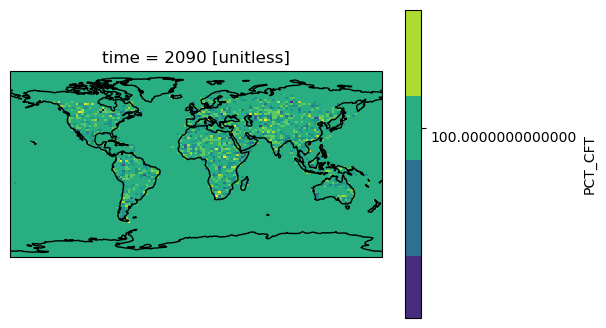

In [25]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
year_data_2090['PCT_CFT'].sum('cft').plot()
axs.coastlines(linewidth=1)

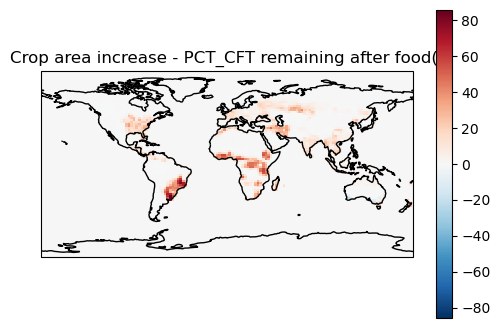

In [183]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(dset1['PCT_CFT'].sum('cft').sel(time=2015)).plot()
biocroparea.plot()
plt.title('Crop area increase - PCT_CFT remaining after food')
diff_CFT = (dset1['PCT_CFT'].sum('cft').sel(time=2090))-(dset1['PCT_CFT'].sum('cft').sel(time=2015)) 
#year_data['PCT_CFT'][dict(cft=56)].plot()
axs.coastlines(linewidth=1)

In [184]:
dset1

<xarray.Dataset>
Dimensions:                  (natpft: 15, cft: 64, Latitude: 96,
                              Longitude: 144, time: 251)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
  * time                     (time) int32 1850 1851 1852 1853 ... 2098 2099 2100
  * Latitude                 (Latitude) float64 -90.0 -88.11 ... 88.11 90.0
  * Longitude                (Longitude) float64 0.0 2.5 5.0 ... 355.0 357.5
Data variables: (12/22)
    LANDFRAC_PFT             (Latitude, Longitude) float64 ...
    PFTDATA_MASK             (Latitude, Longitude) int32 ...
    PCT_CROP                 (time, Latitude, Longitude) float64 ...
    PCT_CROP_MAX             (Latitude, Longitude) float64 ...
    PCT_NAT_PFT              (time, natpft, Latitude, Longitude) float64 ...
    PCT_NAT_PFT_MAX          (natpft, Latitude, Longitude) float64 ...
    ...                       ...
    HARVEST_SH2              (time, Latitude, Longitude) float64 ...
    HARVEST_SH3              (time, Latitude, Longitude) float64 ...
    GRAZING                  (time, Latitude, Longitude) float64 ...
    FERTNITRO_CFT            (time, cft, Latitude, Longitude) float64 ...
    UNREPRESENTED_PFT_LULCC  (time, natpft, Latitude, Longitude) float64 ...
    UNREPRESENTED_CFT_LULCC  (time, cft, Latitude, Longitude) float64 ...
Attributes: (12/41)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-28-19 14:03:18
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    map_agfirepkmon_file:                 map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_gdp_file:                         map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_peatland_file:                    map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_soildepth_file:                   map_5x5min_ORNL-Soil_to_1.9x2.5_nom...
    map_topography_stats_file:            map_1km-merge-10min_HYDRO1K-merge-n...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_1850.c...

In [152]:
dset1['PCT_CROP']

<xarray.DataArray 'PCT_CROP' (time: 251, Latitude: 96, Longitude: 144)>
[3469824 values with dtype=float64]
Coordinates:
  * time       (time) int32 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:  total percent crop landunit
    units:      unitless

In [11]:
#diff.sum()
year_data.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/landuse.tseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr2090_c25042023_allvar.nc', encoding={'PCT_CFT': {'dtype': 'float64'} })

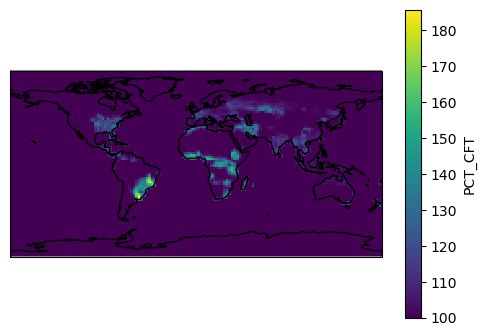

In [21]:

file_mod  = '/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c230404.nc'

dsetnew = xr.open_dataset(file_mod, decode_times=False)
dsetnew = dsetnew.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dsetnew=dsetnew.assign_coords(Latitude=dsetnew['LATIXY'][:,0].values)
dsetnew=dsetnew.assign_coords(Longitude=dsetnew['LONGXY'][0,:].values)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dsetnew['PCT_CFT'].sum('cft')).plot()
axs.coastlines(linewidth=1)
#plt.close()


In [20]:
dsetnew['PCT_CFT'].sum('cft')

<xarray.DataArray 'PCT_CFT' (Latitude: 96, Longitude: 144)>
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5

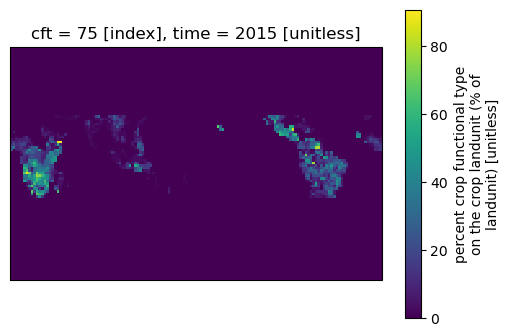

In [90]:
file = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP1-2.6_78pfts_CMIP6_simyr1850-2100_c190228.nc'
dset = xr.open_dataset(file, decode_times=False)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_CFT'].sel(time=2015).isel(cft=60).plot()

In [4]:
#First read the data and convert the variable from percentage to area,
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc' #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
dset1['PCT_CFT_area'] =(dset1['PCT_CFT']/100)*dset1['AREA']*dset1['LANDFRAC_PFT']*(dset1['PCT_CROP']/100)
## Find the increase in tot area in 2090
TotCFTArea_2090_wosugarcane=(dset1['PCT_CFT_area'].sel(time=2090).sum('cft'))-(dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)]) 
TotCFTArea_2015_wosugarcane=(dset1['PCT_CFT_area'].sel(time=2015).sum('cft'))-(dset1['PCT_CFT_area'].loc[dict(cft=52, time=2015)]) 
#Find the increase in tot area in 2090 wrt 2015 without sugarcane
TotCFTArea_diff_2090 = TotCFTArea_2090_wosugarcane -TotCFTArea_2015_wosugarcane  # increased area in 2090 wo sugarcane

##Now filter out the gridpoints where area is decreased,
increased_area = xr.where(TotCFTArea_diff_2090 > 0, TotCFTArea_diff_2090, 0)

#  Add the increased area to the specific cft in 2080, ##2015 area+ increased
updated_cft_60_2090 =  increased_area # dset1['PCT_CFT_area'].loc[dict(cft=60, time=2015)] + increased_area

dset1['PCT_CFT_area'].loc[dict(cft=60, time=2080)] = updated_cft_60_2090

#Now,copy and keep the sugarcane and corn (increased) area of 2090 into a new variable 
cft_52_2090 = dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)].copy()  # Select the values for cft=52 in 2080, sugarcane
cft_60_2090 = dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].copy()  # Select the values for cft=60 in 2080, corn


##Creating the new dataset of 2090, first copy 2015 data to 2090
dset1['PCT_CFT_area_new'] = xr.zeros_like(dset1['PCT_CFT_area'])
dset1['PCT_CFT_area_new'].sel(time=2090)[:] = dset1['PCT_CFT_area'].sel(time=2015)
dset1['PCT_CFT_area_new'].loc[dict(cft=60, time=2090)] = cft_60_2090
dset1['PCT_CFT_area_new'].loc[dict(cft=52, time=2090)] = cft_52_2090



##Now check the sum of PCT_CFT of 2090 in the new dataset  is the same as that of the old
print(dset1['PCT_CFT_area_new'].loc[dict(cft=52, time=2090)].sum())
print(dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)].sum())



<xarray.DataArray 'PCT_CFT_area_new' ()>
array(44902.60375941)
Coordinates:
    cft      int32 52
    time     int32 2090
<xarray.DataArray 'PCT_CFT_area' ()>
array(44902.60375941)
Coordinates:
    cft      int32 52
    time     int32 2090


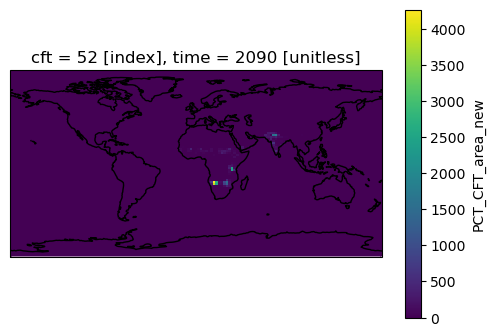

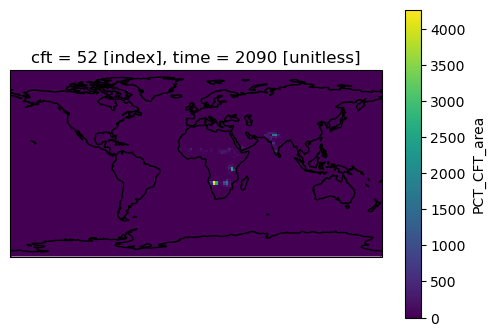

In [6]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset1['PCT_CFT_area_new'].loc[dict(cft=52, time=2090)]).plot()
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset1['PCT_CFT_area'].loc[dict(cft=52, time=2090)]).plot()
axs.coastlines(linewidth=1)